# Zuber Performance Analysis

My goal: perform analysis for a new ride share company, Zuber, using data from competitors. draw conclusions based on graphs, comparing the top 10 most popular neighboords.
     

The steps to acheive this goal is:
    1. import the files
    2. study the data they contain
    3. make sure the data types are correct
    4. identify the top 10 neighborhoods in terms of drop-offs
    5. make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
    6. draw conclusions based on each graph and explain the results

### Import Files

In [1]:
#libraries 
import pandas as pd

pd.options.mode.chained_assignment = None  
# import numpy as np
import matplotlib.pyplot as plt
# from math import factorial
from scipy import stats as st
# import seaborn as sns

In [2]:
#Import data files into dataframes
name_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
time_location = pd.read_csv('/datasets/project_sql_result_04.csv')

### Study Data

In [3]:
#study first data frame
name_trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [4]:
#study second data frame
time_location

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


I look at the data within the dataframe to see what the column names represent. Does the name of the column make sense based on the data? Trip amout should be called trip count, for clarity. Average trips values can be made to look more clear with rounding. 


Each dataframe has 2 columns: name_trips has 64 rows, time_location has 94 rows. Some company names have numbers possibly to represent zipcode. All column names are lowercase and snakecase!!

In [5]:
#check for missing values
name_trips.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [6]:
#check for missing values
time_location.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

No missing values in either dataframe

In [7]:
#check datatype
name_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
#check datatype
time_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


company name should stay an object value, despite the fact some values have numbers. This is because the zipcode is apart of the name (also more than one company might have the same zipcode bc many companys exist in the same zipcode).

trips_amount should stay int value, because you can only have a whole number for a value like a trip.

dropoff_location_name should stay as an object because the name is based on a city 

average trips is the datatype I will change. float values are not necessary, I will work with int. This is for. larity when I make analysis 

### Clean Data

In [9]:
#change data type to int
time_location['average_trips'] = time_location['average_trips'].astype(int)
time_location

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
...,...,...
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,1


In [10]:
#change column name
name_trips['trip_count'] = name_trips['trips_amount']
del name_trips['trips_amount']
name_trips

,company_name,trip_count
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


### Top 10 Neighborhoods

In [11]:
#identify the top 10 neighborhoods in terms of drop-offs
top_10_neighborhoods = time_location.groupby(['dropoff_location_name'])
top_10_neighborhoods = time_location.sort_values(by='average_trips', ascending=False).head(10)
display(top_10_neighborhoods)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


#### Graph

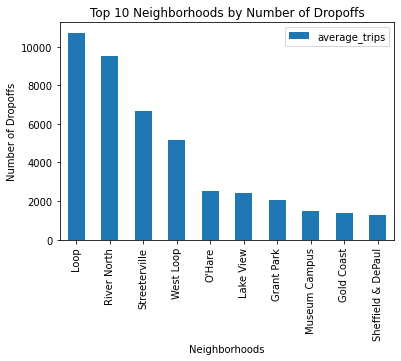

In [12]:
#top 10 neighborhoods by number of dropoffs
top_10_neighborhoods.set_index('dropoff_location_name').plot(kind='bar')
plt.title('Top 10 Neighborhoods by Number of Dropoffs')
plt.ylabel("Number of Dropoffs")
plt.xlabel("Neighborhoods")
plt.show()

### Top 10 Companies

In [13]:
#taxi companies and number of dropoffs
top_10_companies = name_trips.groupby(['company_name'])
top_10_companies = name_trips.sort_values(by='trip_count', ascending=False).head(10)
display(top_10_companies)

,company_name,trip_count
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


#### Graph

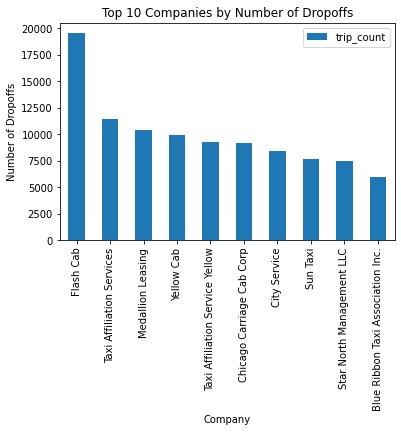

In [14]:
#top 10 company_name by number of dropoffs
top_10_companies.set_index('company_name').plot(kind='bar')
plt.title('Top 10 Companies by Number of Dropoffs')
plt.ylabel("Number of Dropoffs")
plt.xlabel("Company")
plt.show()

### Conclusions 

What was the purpose of this? We want to target the companies with the most completed rides, aka drop-offs. We also want to target the most popular neighborhoods the drop-offs occur in. It's important to see which companies have the highest revenue, so this is why completed rides is valueable data. We want to study which neighborhoods the companies have the most success in. Creating a visual is imporant to compare the top 10 companies and neighboorhoods.  

Do the values make sense? Yes. The range is 20,000 - 5,000 rides over the top 10 companies. No company has a suspiciously high number of completed rides. The drop offs in the most popular neighboorhoods are between 9,000-2,000. This is reasonable as well. Over 9,000 drop-offs in the most popular neighborhood makes sense if the most popular cab company completes 20,000. It's not like that 100% of the rides for the company happen in one neighboorhood - so it would be suspicious if the top neighborhood has a value equal to or greater than 20,000.

Is the difference signficant for neigborhoods?  I consider the top 4 values significant. The range I mentioned above is how I determine this. The top 4 values are popular enough to be profitable for a new company. The top 5-10 neighborhood drop off values have significant decrease in popularilty. 

Is the difference signficant for companies? Clearly there is one company that stands high above the others. What is the purpose of finding the top company if I'm hired by Zuber? Should we look at this top comapny as our competion? We cna gather data on this company. What do riders dislike and like about this top company? How can Zuber make an improved experience for riders that this top company can't provide?

### Import Files 

##### my goal test the impact of weather on ride frequency using ttest

In [15]:
#import 
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

### Study Data

In [16]:
#study dataframe
df_weather

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [17]:
#unique values for weather conditions
df_weather['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [18]:
#missing values??
df_weather.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [19]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


I look at the data within the dataframe to see what the column names represent. start_ts has year, month, day digit, and hour of day (for the start of the ride). weather_conditions are either Good or Bad. duration_seconds tells us how long the ride lasted. 

1068 rows and 3 columns. all lowercase and snake_case. No missing values!! I do need to change start_ts datatype to datetime. duration_seconds can also be changed.

### Clean Data

In [20]:
#change datatype
df_weather['duration_seconds'] = df_weather['duration_seconds'].astype(int)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_ts            1068 non-null   object
 1   weather_conditions  1068 non-null   object
 2   duration_seconds    1068 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 25.2+ KB


In [21]:
#change datatype
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'], format='%Y-%m-%d %H:%M:%S')
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


Now all the datatypes make sense and are in the correct format.

### Test Hypothesis

Null: There is no difference in avg duration of rides on Saturdays when weather conditions are 'bad' or 'good'

Alt: There is a significant difference in avg duration of rides on Saturdays when weather conditions are 'bad' or 'good''


In [22]:
sample_1 = df_weather[df_weather['weather_conditions'] == 'Good']['duration_seconds']
sample_2 = df_weather[df_weather['weather_conditions'] == 'Bad']['duration_seconds']

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2,nan_policy='omit')

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis') 



p-value:  6.517970327099473e-12
We reject the null hypothesis


The null hypothesis was rejected in favor of the alt hypothesis. This means that the pvalue is less than the alpha value. There is a significant difference in avg duration of rides on Saturdays when weather conditions are 'bad' or 'good'...but why?

Our ttest shows we've found statistically significant difference in average duration of a ride on Satruday in bad weather.Is there an explanation for this? The weather may impact the NUMBER of rides in that day, because people wanting to avoid bad weather will call a ride company...how can it affect the duration?? It's possible if more rides are being ordered, traffic might increase, and therefore the duration of a ride might increase. If the weather is bad enough, it may impact driving conditions and slow traffic, increasing the duration again.

## Report

What makes Zuber different? We need to study the company Flash Cab, the most popular rideshare company. Gather data on riders who use this company: What do they like about it? What do they dislike? What can Zuber do to improve the rider experience? In order for Zuber to be succesful, it needs a feature that is imporant to riders, that other companies don't offer. 

Zuber also needs to build a community of drivers. The most popular neighborhoods likely correlate with high revenue. I will present the top 10 neighborhoods, the Zuber team will come up with a strategy to employee drivers who agree to service those drop off locations.